In [5]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
from geopy.distance import great_circle
from scipy.stats.stats import pearsonr

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rphinney/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:

station = 'USW00014935'   #SALT LAKE CITY
#station = 'USW00093009'
 
filename = '/Users/rphinney/Documents/Hollings/ghcnd_all/'+station+'.dly'
file = open(filename, 'r')
station_array = ['USW00014942','USW00003812','USW00014939']

 OMAHA EPPLEY AIRFIELD        
41.3103
 -95.8992 
41.28125
-95.90625
94
 ASHEVILLE RGNL AP            
35.4319
 -82.5375 
35.40625
-82.53125
94
 LINCOLN MUNI AP              
40.8508
 -96.7475 
40.84375
-96.78125
94


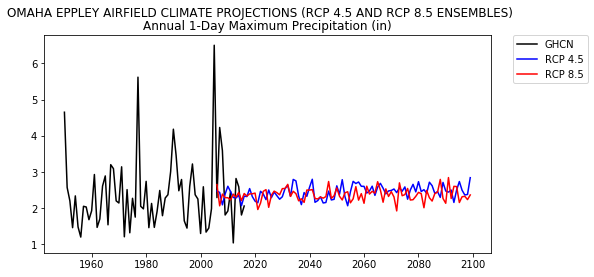

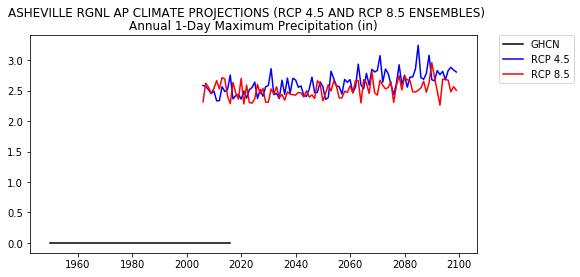

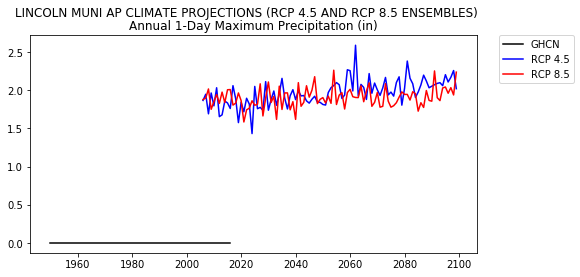

In [8]:

xaxis = np.arange(1950,2017)
midstations = open('/Users/rphinney/Documents/midstations3.txt','r')
#station_array = []

#for n in midstations:
#    all_id = n[0:11]
#    station_array.append(all_id)

for station in station_array:
    station = station.strip()
    
    #Using ghcnd-stations.txt get the station information

    path = '/Users/rphinney/Documents/Hollings/ghcnd-stations.txt'

    station_file = open(path)
    ghcnd = []

    for x in station_file:
        ghcnd.append(x)

    for each_line in ghcnd:   
        if each_line[0:11] == station:
            station_name = each_line[40:70]
            station_state = each_line[38:40]
            latitude = each_line[13:20]
            longitude = each_line[21:31]
            elevation = each_line[32:38]
            station_name.strip()
            print(station_name)
            print(latitude)
            print(longitude)



    #------------------------------------------------------------------
    #find nearest grid from the livneh file

    #filepath = '/Users/rphinney/Documents/Hollings/GISS-E2-R_prmax1day_rcp85_2006_2100.nc'
    #file2 = '/Users/rphinney/Documents/Hollings/GISS-E2-R_prmax1day_rcp45_2006_2100.nc'

    rcp = '4'

    filedays = '/Users/rphinney/Documents/Hollings/pr-days-above-99th/rcp'+rcp+'5/ensemble.nc'
    filepr = '/Users/rphinney/Documents/Hollings/pr-above-99th/rcp'+rcp+'5/ensemble.nc'
    filewd = '/Users/rphinney/Documents/Hollings/consecWD/rcp'+rcp+'5/ensemble.nc'
    filedd = '/Users/rphinney/Documents/Hollings/consecDD/rcp'+rcp+'5/ensemble.nc'
    filemax1 = '/Users/rphinney/Documents/Hollings/prmax1day/rcp'+rcp+'5/ensemble.nc'
    filemax5 = '/Users/rphinney/Documents/Hollings/prmax5day/rcp'+rcp+'5/ensemble.nc'
    #filepath = '/Users/rphinney/Documents/Hollings/pr-days-above-99th/output_model.nc'

    filepath = '/Users/rphinney/Documents/Hollings/prmax1day/rcp45/ensemble.nc'
    file2 = '/Users/rphinney/Documents/Hollings/prmax1day/rcp85/ensemble.nc'
    data = Dataset(filepath)
    data2 = Dataset(file2)

    lon = data.variables['lon'][:]
    lat = data.variables['lat'][:]
    prcp = data.variables['prmax1day'][:]
    prcp2 = data2.variables['prmax1day'][:]
    #print(prcp)


    station_loc = (latitude,longitude)
    min_loc = 9999

    for lons in lon:
        for lats in lat:
            check_loc = (lats,lons)
            b = int(great_circle(station_loc,check_loc).miles)
            if b < min_loc:
                min_loc = b
                min_lat = lats
                min_lon = lons-360

    y = np.arange(1950,2017)           
    #scatter plot the precip values at the grid nearest to the lincoln station
    prcpa = []
    prcpb = []
    lon_count = -1
    lat_count = -1
    for lons in lon:
        lon_count = lon_count +1
        if lons == min_lon+360:
            for lats in lat:
                lat_count = lat_count + 1
                if lats == min_lat:
                    for x in range (0,94):
                        prcp45 = .03937*prcp[x,lat_count,lon_count]
                        prcpa.append(prcp45)
                        prcp85 = .03937*prcp2[x,lat_count,lon_count]
                        prcpb.append(prcp85)

                        #plt.plot(y[x],.03937*prcp[x,lat_count,lon_count],'o', color = 'blue')

    print(min_lat)
    print(min_lon)
    print(size(prcpa))
    y = np.arange(1950,2014)
    #plt.plot(y,prcpa,color = 'blue')

    #plt.title('Annual 1-Day Maximum Precipitation (in)')
    #plt.suptitle(station_name.strip() + ' VS LIVNEH NEAREST GRID BOX')


    #---------------------------------------------------------------------------
    #find the annual max 1 day precip from the GHCN station



    begin_year = 1950
    end_year = 2013

    mylist = []

    for line in file:
        mylist.append(line)

    daymax = []
    for year in range(1950,2017):
        year_prcp = []
        for line in mylist:
            if int(line[11:15]) == year:
                if line[17:21] == 'PRCP':
                    year_prcp.append(line)

        new_prcp = []
        trace = []
        for dat in year_prcp:
            char1 = 22
            char2 = 26
            while char1 != 270:
                if dat[char1:char2] == '9999':
                    char1 = char1 + 8
                    char2 = char2 + 8
                else:
                    prcp = (.003937*int(dat[char1:char2])) 
                    new_prcp.append(prcp)
                    char1 = char1 + 8
                    char2 = char2 + 8
        
        #Get the maximum one-day precip value------------------------------------------
        day_max = max(new_prcp, default = 0)
        daymax.append(day_max)

    #x = np.arange(1950,2100)
    xaxis = np.arange(1950,2017)
    #plt.plot(x,daymax, color = 'red')


    #def zero_to_nan(values):
    #    """Replace every 0 with 'nan' and return a copy."""
    #    return [float('nan') if xaxis==0 else xaxis for xaxis in values]

    a = np.arange(2006,2100)
    #daymax.extend(prcpa)
    #print(daymax)
    plt.figure(figsize(8,4))
    plt.plot(xaxis,daymax, color = 'black', label = 'GHCN')
    #plt.plot(x,prcpa, color = 'red')
    plt.plot(a,prcpb,color = 'blue', label = 'RCP 4.5')
    plt.plot(a,prcpa, color = 'red', label = 'RCP 8.5')



    plt.title('Annual 1-Day Maximum Precipitation (in)')
    plt.suptitle(station_name.strip() + ' CLIMATE PROJECTIONS (RCP 4.5 AND RCP 8.5 ENSEMBLES)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
print(type(prcp))